In [6]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load the partial feature engineered training dataset
df = pd.read_csv('../data/train_partial_fe.csv')

In [8]:
#get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    889 non-null    int64  
 1   Survived       889 non-null    int64  
 2   Pclass         889 non-null    int64  
 3   Sex            889 non-null    object 
 4   Age            889 non-null    float64
 5   SibSp          889 non-null    int64  
 6   Parch          889 non-null    int64  
 7   Fare           889 non-null    int64  
 8   Embarked       889 non-null    object 
 9   GroupSize      889 non-null    int64  
 10  Title          889 non-null    object 
 11  FamilySize     889 non-null    int64  
 12  IsAloneFamily  889 non-null    int64  
 13  IsAloneGroup   889 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 97.4+ KB


In [9]:
#count unique values for each column
for column in df.columns:
    unique_values = df[column].nunique()
    print(f'Column: {column}, Unique Values: {unique_values}')

Column: PassengerId, Unique Values: 889
Column: Survived, Unique Values: 2
Column: Pclass, Unique Values: 3
Column: Sex, Unique Values: 2
Column: Age, Unique Values: 90
Column: SibSp, Unique Values: 7
Column: Parch, Unique Values: 7
Column: Fare, Unique Values: 90
Column: Embarked, Unique Values: 3
Column: GroupSize, Unique Values: 7
Column: Title, Unique Values: 5
Column: FamilySize, Unique Values: 9
Column: IsAloneFamily, Unique Values: 2
Column: IsAloneGroup, Unique Values: 2


In [12]:
#identify categorical, numerical and target columns
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAloneFamily', 'IsAloneGroup']
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'GroupSize']
target_col = 'Survived'

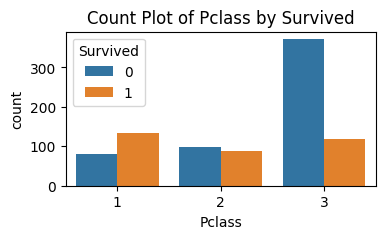

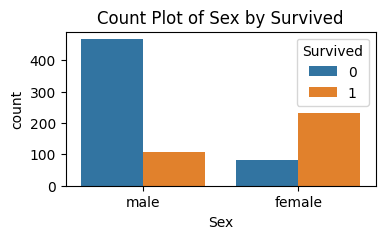

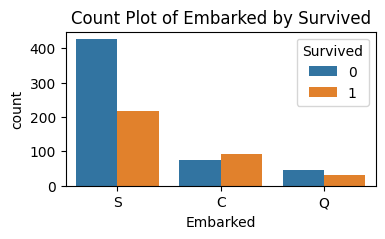

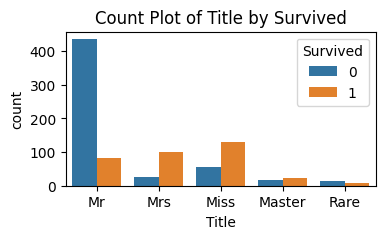

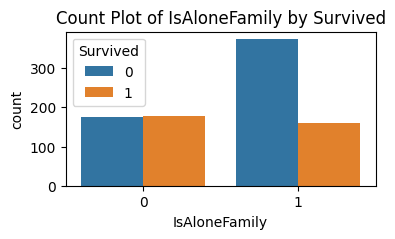

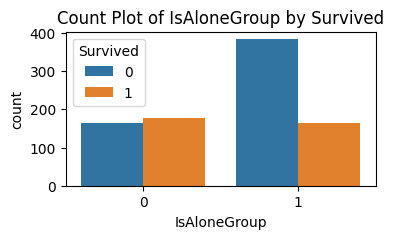

In [14]:
#plot count plots for categorical features with respect to target variable
for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=col, hue=target_col)
    plt.title(f'Count Plot of {col} by {target_col}')
    plt.show()

In [19]:
#print survival percentages for all categories for all categorical features
for col in categorical_cols:
    survival_rates = df.groupby(col)[target_col].mean() * 100
    print(f'Survival Percentages by {col}:\n{survival_rates}\n')

Survival Percentages by Pclass:
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival Percentages by Sex:
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64

Survival Percentages by Embarked:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

Survival Percentages by Title:
Title
Master    57.500000
Miss      70.108696
Mr        15.667311
Mrs       79.200000
Rare      34.782609
Name: Survived, dtype: float64

Survival Percentages by IsAloneFamily:
IsAloneFamily
0    50.564972
1    30.093458
Name: Survived, dtype: float64

Survival Percentages by IsAloneGroup:
IsAloneGroup
0    51.754386
1    29.798903
Name: Survived, dtype: float64



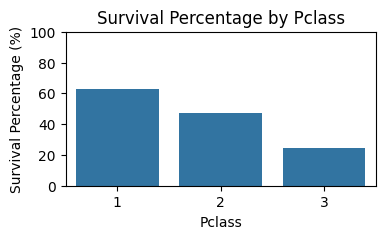

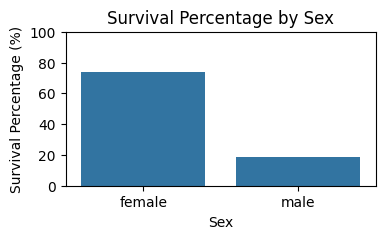

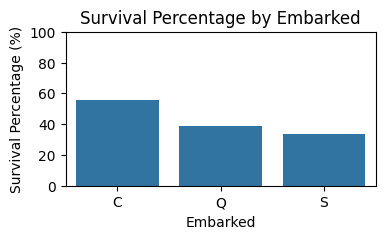

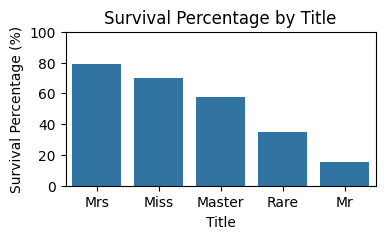

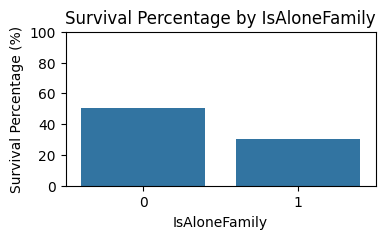

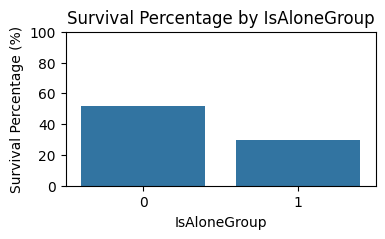

In [21]:
#for each categorical feature, plot survival percentage per category in a decreasing order
for col in categorical_cols:
    survival_rates = df.groupby(col)[target_col].mean() * 100
    survival_rates = survival_rates.sort_values(ascending=False)
    plt.figure(figsize=(4, 2))
    sns.barplot(x=survival_rates.index, y=survival_rates.values)
    plt.title(f'Survival Percentage by {col}')
    plt.ylabel('Survival Percentage (%)')
    plt.xlabel(col)
    plt.ylim(0, 100)
    plt.show()

In [ ]:
"""
Observations:
1. Pclass: Higher class passengers had a significantly higher survival rate, with 1st class passengers having the highest survival percentage.
2. Sex: Female passengers had a much higher survival rate compared to male passengers.
3. Embarked: Passengers who embarked from Cherbourg (C) had a higher survival rate compared to those from Southampton (S) and Queenstown (Q).
4. Title: Passengers with titles indicating higher social status (e.g., 'Mrs', 'Miss', 'Master') had higher survival rates compared to those with lower status titles (e.g., 'Mr', 'Rare').
5. IsAloneFamily and IsAloneGroup: Passengers who were not alone (IsAloneFamily = 0 or IsAloneGroup = 0) had a higher survival rate compared to those who were alone (IsAloneFamily = 1 or IsAloneGroup = 1).
"""

"\nObservations:\n1. The higher the passenger class (Pclass), the higher the survival rate (1st class > 2nd class > 3rd class).\n2. Females survival rate is significantly higher than males.\n3. Passengers embarking from Cherbourg (C) have a higher survival rate compared to those from Queenstown (Q) and Southampton (S).\n4. Titles suggest that females with titles like 'Mrs' and 'Miss' have higher survival rates, followed by 'master' suggesting young males, with 'Mr' having the lowest survival rates.\n5. Passengers who were not alone (IsAloneFamily = 0 or IsAloneGroup = 0) had a higher survival rate compared to those who were alone (IsAloneFamily = 1 or IsAloneGroup = 1).\n"

C:\Users\adity\AppData\Local\Temp\ipykernel_20400\208439875.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')


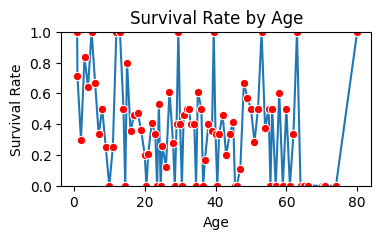

C:\Users\adity\AppData\Local\Temp\ipykernel_20400\208439875.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')


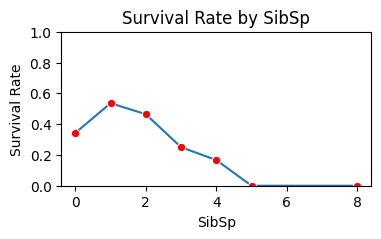

C:\Users\adity\AppData\Local\Temp\ipykernel_20400\208439875.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')


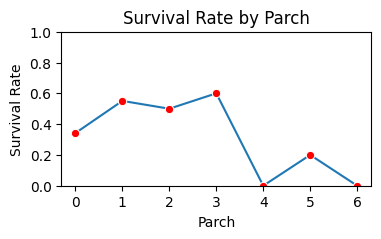

C:\Users\adity\AppData\Local\Temp\ipykernel_20400\208439875.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')


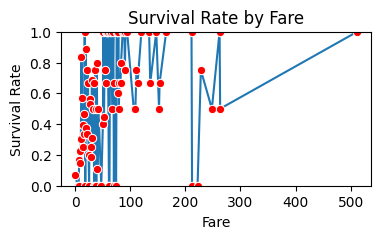

C:\Users\adity\AppData\Local\Temp\ipykernel_20400\208439875.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')


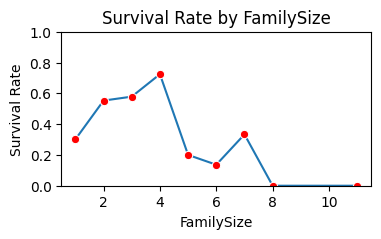

C:\Users\adity\AppData\Local\Temp\ipykernel_20400\208439875.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')


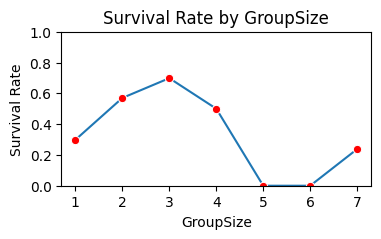

In [32]:
#calculate survival rate for each numerical feature at each unique value and create a line plot
#add red pointers at each data point
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.lineplot(x=df[col], y=df[target_col], ci=None, marker='o', markerfacecolor='red')
    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate')
    plt.xlabel(col)
    plt.ylim(0, 1)
    plt.show()

In [ ]:
"""
Observations:
1. Age: Younger passengers tend to have a higher survival rate, with a noticeable drop in survival rate as age increases.
2. SibSp: Passengers with 1 or 2 siblings/spouses aboard have a higher survival rate compared to those with none or many.
3. Parch: Similar to SibSp, passengers with 1 or 2 parents/children aboard have a higher survival rate.
4. Fare: There is a positive correlation between fare paid and survival rate, with higher fares associated with higher survival rates.
5. FamilySize and GroupSize: Passengers with smaller family or group sizes tend to have higher survival rates, indicating that traveling alone or in small groups may have been advantageous.
"""

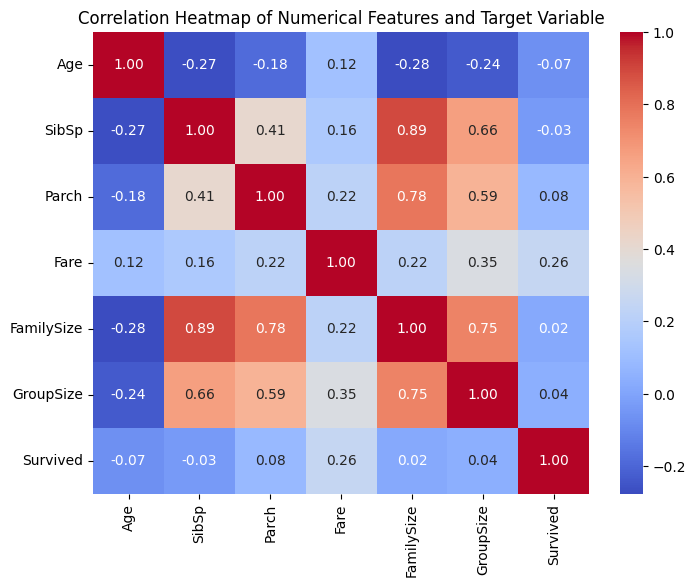

In [33]:
#create a correlation heatmap for numerical features including target variable
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols + [target_col]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features and Target Variable')
plt.show()